# GenAI with Python

###### [Article: TowardsDataScience](https://towardsdatascience.com/genai-with-python-rag-with-llm-complete-tutorial-c276dda6707b)

### Data

pages: 96


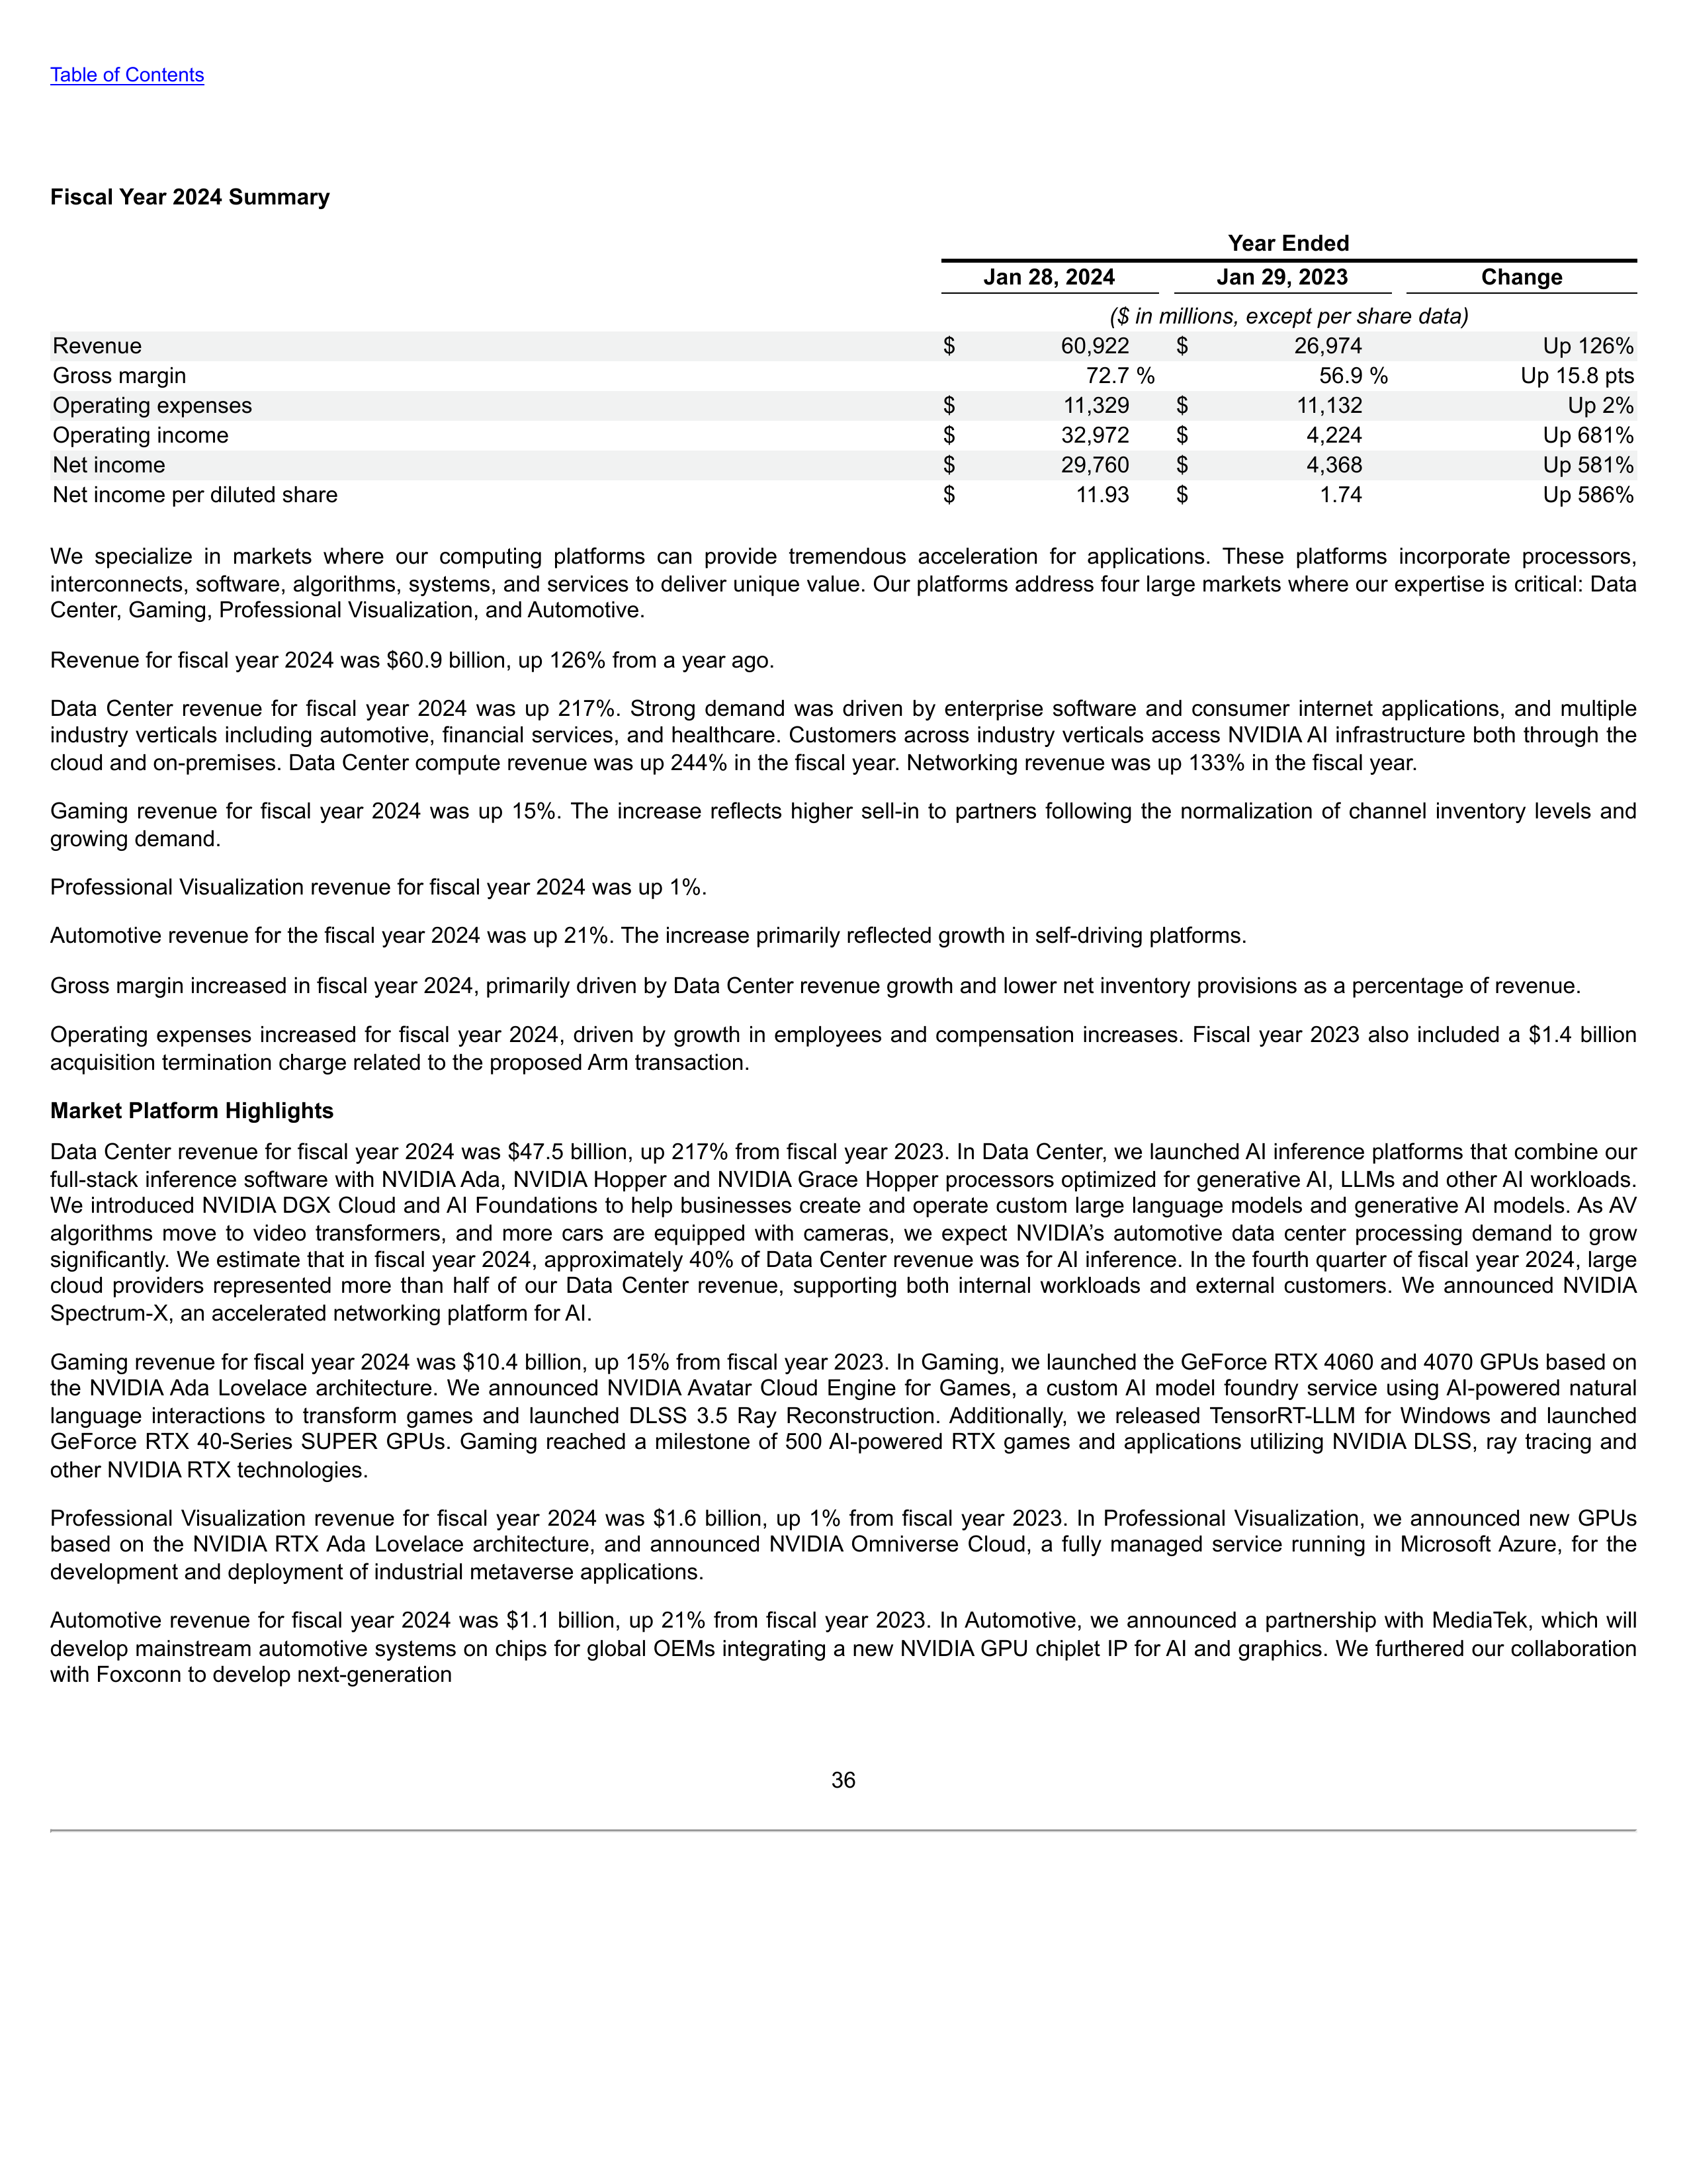

In [5]:
#conda install -c conda-forge poppler
import pdf2image #1.17.0

doc_img = pdf2image.convert_from_path("data/doc_nvidia.pdf", dpi=300)

print("pages:", len(doc_img))
doc_img[35]

In [6]:
import pytesseract #0.3.10
from tqdm.notebook import tqdm

doc_txt = []
for page in tqdm(doc_img):
    text = pytesseract.image_to_string(page)
    doc_txt.append(text)

doc_txt[35]

  0%|          | 0/96 [00:00<?, ?it/s]

'Table of Contents\n\nFiscal Year 2024 Summary\n\nYear Ended\nJan 28, 2024 Jan 29, 2023 Change\n($ in millions, except per share data)\nRevenue $ 60,922 $ 26,974 Up 126%\nGross margin 72.7 % 56.9 % Up 15.8 pts\nOperating expenses $ 11,329 $ 11,132 Up 2%\nOperating income $ 32,972 $ 4,224 Up 681%\nNet income $ 29,760 $ 4,368 Up 581%\nNet income per diluted share $ 11.93 $ 1.74 Up 586%\n\nWe specialize in markets where our computing platforms can provide tremendous acceleration for applications. These platforms incorporate processors,\ninterconnects, software, algorithms, systems, and services to deliver unique value. Our platforms address four large markets where our expertise is critical: Data\nCenter, Gaming, Professional Visualization, and Automotive.\n\nRevenue for fiscal year 2024 was $60.9 billion, up 126% from a year ago.\n\nData Center revenue for fiscal year 2024 was up 217%. Strong demand was driven by enterprise software and consumer internet applications, and multiple\nindus

### Preprocessing

In [7]:
title_map = {
    "4-12":"Business",
    "13-33":"Risk Factors",
    "34-44":"Financials",
    "45-46":"Directors",
    "47-83":"Data"
}

In [18]:
lst_docs, lst_ids, lst_metadata = [], [], []
for n,page in enumerate(doc_txt):
    try:
        ## get title
        title = [v for k,v in title_map.items() if n in range(int(k.split("-")[0]), int(k.split("-")[1])+1)][0]
        ## clean page
        page = page.replace("Table of Contents","")
        ## get paragraph
        for i,p in enumerate(page.split('\n\n')):
            if len(p.strip())>5:
                lst_docs.append(p.strip())
                lst_ids.append(str(n)+"_"+str(i))
                lst_metadata.append({"title":title})
    except:
        continue

print(len(lst_docs), "=", len(lst_ids), "=", len(lst_metadata))

1077 = 1077 = 1077


In [25]:
for id,doc,meta in zip(lst_ids[375:378], lst_docs[375:378], lst_metadata[375:378]):
    print(id, "-", meta, "\n", doc, "\n")

35_1 - {'title': 'Financials'} 
 Fiscal Year 2024 Summary 

35_2 - {'title': 'Financials'} 
 Year Ended
Jan 28, 2024 Jan 29, 2023 Change
($ in millions, except per share data)
Revenue $ 60,922 $ 26,974 Up 126%
Gross margin 72.7 % 56.9 % Up 15.8 pts
Operating expenses $ 11,329 $ 11,132 Up 2%
Operating income $ 32,972 $ 4,224 Up 681%
Net income $ 29,760 $ 4,368 Up 581%
Net income per diluted share $ 11.93 $ 1.74 Up 586% 

35_3 - {'title': 'Financials'} 
 We specialize in markets where our computing platforms can provide tremendous acceleration for applications. These platforms incorporate processors,
interconnects, software, algorithms, systems, and services to deliver unique value. Our platforms address four large markets where our expertise is critical: Data
Center, Gaming, Professional Visualization, and Automotive. 



### LLM Generator

###### TEXT

In [26]:
import ollama #0.2.1

def keyword_generator(p, top=3):
    prompt = "summarize the following paragraph in 3 keywords separated by ,: "+p
    res = ollama.generate(model="phi3", prompt=prompt)["response"]
    #lst = [k.replace("\n"," ").strip() for k in res.split(",")][:top]
    #str = ", ".join(lst)
    return res.replace("\n"," ").strip()

p = '''Professional artists, architects and designers use NVIDIA partner products accelerated with our GPUs and software platform for a range of creative and design
use cases, such as creating visual effects in movies or designing buildings and products. In addition, generative Al is expanding the market for our workstation-
class GPUs, as more enterprise customers develop and deploy Al applications with their data on-premises.'''
print(keyword_generator(p))

Creative Design, NVIDIA Partnerships, AI Expansion


In [27]:
for i,doc in tqdm(enumerate(lst_docs)):
    lst_metadata[i]["keywords"] = keyword_generator(doc)

0it [00:00, ?it/s]

In [28]:
for id,doc,meta in zip(lst_ids[375:378], lst_docs[375:378], lst_metadata[375:378]):
    print(id, "-", meta, "\n", doc, "\n")

35_1 - {'title': 'Financials', 'keywords': 'Budget Allocation, Government Expenditure, Financial Planning'} 
 Fiscal Year 2024 Summary 

35_2 - {'title': 'Financials', 'keywords': 'Revenue Growth, Margin Increase, Profit Surge'} 
 Year Ended
Jan 28, 2024 Jan 29, 2023 Change
($ in millions, except per share data)
Revenue $ 60,922 $ 26,974 Up 126%
Gross margin 72.7 % 56.9 % Up 15.8 pts
Operating expenses $ 11,329 $ 11,132 Up 2%
Operating income $ 32,972 $ 4,224 Up 681%
Net income $ 29,760 $ 4,368 Up 581%
Net income per diluted share $ 11.93 $ 1.74 Up 586% 

35_3 - {'title': 'Financials', 'keywords': 'Computing Acceleration, Market Specialization, Diverse Platforms'} 
 We specialize in markets where our computing platforms can provide tremendous acceleration for applications. These platforms incorporate processors,
interconnects, software, algorithms, systems, and services to deliver unique value. Our platforms address four large markets where our expertise is critical: Data
Center, Gamin

###### TABLE

In [44]:
table = lst_docs[376]
print("Table:\n", table)

prompt = f"Summarize the following table: {table}"
res = ollama.generate(model="phi3", prompt=prompt)["response"]

print("\nSummary:\n", res)

Table:
 Year Ended
Jan 28, 2024 Jan 29, 2023 Change
($ in millions, except per share data)
Revenue $ 60,922 $ 26,974 Up 126%
Gross margin 72.7 % 56.9 % Up 15.8 pts
Operating expenses $ 11,329 $ 11,132 Up 2%
Operating income $ 32,972 $ 4,224 Up 681%
Net income $ 29,760 $ 4,368 Up 581%
Net income per diluted share $ 11.93 $ 1.74 Up 586%

Summary:
  The table shows financial performance for the fiscal year ended January 28, 2024, compared to the same period in 2023:

- Revenue increased significantly by 126%, from $26,974 million to $60,922 million.
- Gross margin rose by 15.8 percentage points, reaching 72.7% compared to 56.9%.
- Operating expenses grew by a modest 2%, going up from $11,132 million to $11,329 million.
- Operating income surged by an impressive 681%, increasing from $4,224 million in 2023 to $32,972 million for 2024.
- Net income soared by 581%, jumping from $4,368 million in 2023 to $29,760 million in 2024.
- Net income per diluted share saw a substantial increase of 586

In [45]:
table = lst_docs[376]
print("Table:\n", table)

prompt = f"Give a concise summary of the following table: {table}"
res = ollama.generate(model="phi3", prompt=prompt)["response"]

print("\nSummary:\n", res)

Table:
 Year Ended
Jan 28, 2024 Jan 29, 2023 Change
($ in millions, except per share data)
Revenue $ 60,922 $ 26,974 Up 126%
Gross margin 72.7 % 56.9 % Up 15.8 pts
Operating expenses $ 11,329 $ 11,132 Up 2%
Operating income $ 32,972 $ 4,224 Up 681%
Net income $ 29,760 $ 4,368 Up 581%
Net income per diluted share $ 11.93 $ 1.74 Up 586%

Summary:
  The table shows the financial performance of a company for the fiscal year ended January 28, 2024, compared to the previous year ending January 29, 2023. Revenue saw a significant increase of 126%, from $26,974 million to $60,922 million. Gross margin also improved by 15.8 percentage points, rising from 56.9% to 72.7%. Operating expenses increased slightly by 2%, while operating income surged impressively by 681%, reaching $32,972 million compared to the previous year's $4,224 million. Net income also experienced a substantial growth of 581% from $4,368 million in FY 2023 to $29,760 million in FY 2024. The net income per diluted share increase

###### IMAGES

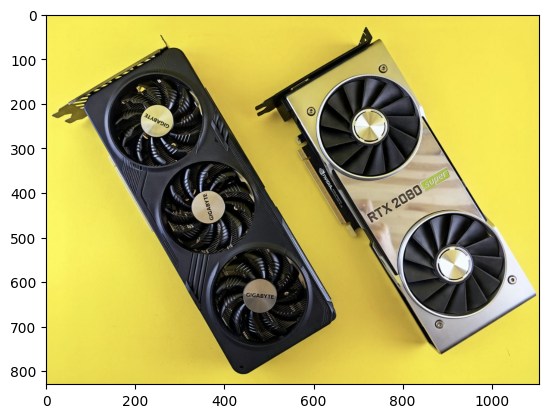

In [2]:
from matplotlib import image, pyplot

image_file = "data/image.png"

pyplot.imshow(image.imread(image_file))
pyplot.show()

In [3]:
## Encode the image into a string
import base64

def encode_image(path):
    with open(path, "rb") as file:
        return base64.b64encode(file.read()).decode('utf-8')

img = encode_image(image_file)
img[:1000]

'iVBORw0KGgoAAAANSUhEUgAABFQAAAM+CAYAAAA0NVXiAAAKrWlDQ1BJQ0MgUHJvZmlsZQAASImVlwdQU+kWgP9700NCS4iAlNCb9BZASggtgIJ0EIWQBAglxEBQsSPiCq4FFRFUBF0VUHBViiwiIoqFRUDB7oIsCsq6WLCh8i4whN19896bd2bOnO+ee/5zzv/P/WfOBYAszxGJUmB5AFKFGeIgb3d6RGQUHTcMMIAG8EAd6HC46SJmYKA/QGTW/l0+9AFoyt4xncr17+//qyjw+OlcAKBAhON46dxUhM8j+pIrEmcAgDqC+HVWZoimuA1hqhhpEOH7U5www6NTHDfNaDAdExLEQpgKAJ7E4YgTACDRET89k5uA5CG5IWwh5AmECIsQdklNTeMhfAZhQyQG8ZGm8jPi/pIn4W8546Q5OZwEKc/sZVrwHoJ0UQpn9f95HP9bUlMkszX0ESUlin2CEKuInNn95DQ/KQvjFgfMsoA3HT/NiRKf0FnmprOiZpnH8fCTrk1Z7D/L8QIvtjRPBjtklvnpnsGzLE4LktaKF7OYs8wRz9WVJIdK/Yl8tjR/VmJI+CxnCsIWz3J6crDfXAxL6hdLgqT984Xe7nN1vaR7T03/y34FbOnajMQQH+neOXP984XMuZzpEdLeeHwPz7mYUGm8KMNdWkuUEiiN56d4S/3pmcHStRnIBzm3NlB6hkkc38BZBiyQBlIQFQM68EeePADI4K/KmNoIK020WixISMygM5EbxqezhVyzBXQrCysbAKbu68zn8I42fQ8h2s05X/YTAJwjJycnm+Z8/sh5nB8GgDg65zOoAoDcDMD1LVyJOHPGN32XMIAI5AAVqAANoAMMgSmwAnbACbgBT+ALAkAIiATLARckglSk85VgLdgEckE+2AX2gWJQCo6Ck+A0OAvqQRO4DK6BW6AL9IJHoB8MgVdgDHwAExAE4SAyRIFUIE1IDzKBrCAG5AJ5Qv5QEBQJxUIJkBC

In [5]:
prompt = "describe the image"
res = ollama.generate(model="phi3", prompt=prompt, images=[img])["response"]
print(res)

 I'm unable to view images directly, but if you provide a description of the image or its contents, I can certainly help you analyze and describe it.

For example, if the image features a landscape with mountains, trees, and a sunset, an appropriate description might be: "The image depicts a serene mountainous landscape at dusk. The scene is bathed in warm hues of orange and pink as the sun sets behind the peaks. Towering trees are silhouetted against the vibrant sky, while their lush foliage adds depth to the scenery."


In [6]:
## LLaVA
prompt = "describe the image"
res = ollama.generate(model="llava", prompt=prompt, images=[img])["response"]
print(res)

 The image shows a display of two computer graphics cards (GPUs) placed side by side. On the left, there is an open-box packaging for a GPU, revealing its internal components and fans, with a visible brand logo indicating it's from Nvidia. The right GPU is a closed retail unit, featuring a prominent brand logo that reads "MSI GeForce," suggesting it's from MSI (a well-known computer hardware company). Both GPUs have black shrouds and cooling fans, and the one on the right has a silver and black color scheme with additional decorative elements. The background is plain, with yellow walls to the left and a white surface to the right, which helps highlight the products without any distractions. 


###### PLOTS

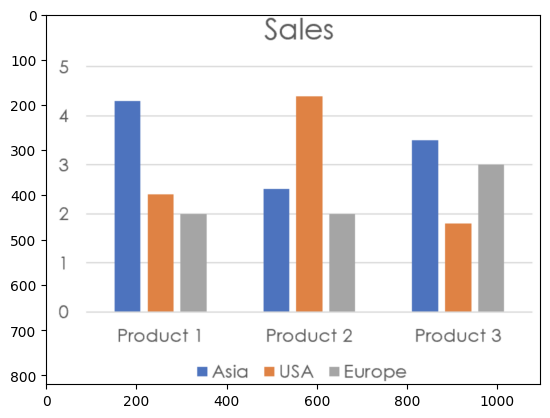

In [7]:
image_file = "data/plot.png"

pyplot.imshow(image.imread(image_file))
pyplot.show()

In [8]:
img = encode_image(image_file)

prompt = "Describe the image in detail. Be specific about graphs, such as bar plots"
res = ollama.generate(model="llava", prompt=prompt, images=[img])["response"]
print(res)

 The image is a digital screenshot of a business performance dashboard. It features multiple charts and graphs that provide an overview of sales data for three products: "Product 1", "Product 2", and "Product 3".

The upper part of the image displays two line graphs with bar plots on top. The left graph represents "Asia" against a scale from 0 to 6, while the right graph shows "Europe" against the same scale. Both graphs have vertical bars in blue for "Product 1", orange for "Product 2", and gray for "Product 3".

Below these graphs are two horizontal bar plots, presumably representing sales volumes or quantities across different regions: "America", "Africa", and "Europe". The bars for each product are colored differently: blue for "Product 1", orange for "Product 2", and gray for "Product 3". The bars have a consistent height, suggesting that the sales volume in these regions is equal.

On the left side of the image, there's a vertical bar chart with the title "Sales" at the top. This

### Database

In [29]:
import chromadb #0.5.0

db = chromadb.PersistentClient()
db.list_collections()

[Collection(name=nvidia)]

In [30]:
collection_name = "nvidia"

if collection_name in [c.name for c in db.list_collections()]:
    db.delete_collection(collection_name)
    print("--- deleted ---")

collection = db.get_or_create_collection(name=collection_name, 
                                         embedding_function=chromadb.utils.embedding_functions.DefaultEmbeddingFunction())

collection.add(documents=lst_docs, ids=lst_ids, metadatas=lst_metadata, 
               images=None, embeddings=None)

collection.peek(1)

--- deleted ---


{'ids': ['10_1'],
 'embeddings': [[-0.047591518610715866,
   0.024682102724909782,
   0.023855814710259438,
   0.005954810418188572,
   0.015420828945934772,
   -0.01788739487528801,
   -0.04011129215359688,
   -0.022446289658546448,
   -0.04171720892190933,
   -0.020844966173171997,
   -0.04196589067578316,
   -0.04655219241976738,
   0.004572858568280935,
   -0.011037970893085003,
   0.04047861322760582,
   0.04321759194135666,
   0.02426465041935444,
   -0.05990944057703018,
   -0.02854069508612156,
   -0.03957819566130638,
   0.010005286894738674,
   -0.0036342227831482887,
   0.061970025300979614,
   -0.0887860357761383,
   0.005217060912400484,
   -0.013864698819816113,
   -0.0550185851752758,
   0.001424842863343656,
   0.020274238660931587,
   0.027130667120218277,
   -0.047183576971292496,
   0.08822397887706757,
   -0.029273172840476036,
   0.048361971974372864,
   0.054405588656663895,
   0.010770195163786411,
   -0.059781644493341446,
   -0.035098761320114136,
   -0.0057298

In [31]:
query = "how much is the revenue?"
collection.query(query_texts=[query])

{'ids': [['78_13',
   '78_7',
   '54_11',
   '54_13',
   '37_1',
   '39_2',
   '35_4',
   '78_12',
   '69_5',
   '70_1']],
 'distances': [[0.3881477812214862,
   0.414599754463739,
   0.6890628337860107,
   0.7084571123123169,
   0.7561033964157104,
   0.7571808099746704,
   0.7699214816093445,
   0.7703176357219828,
   0.8317533731460571,
   0.8592502474784851]],
 'metadatas': [[{'keywords': 'Sales income, economic measurement, financial performance',
    'title': 'Data'},
   {'keywords': 'Revenue, Growth Decline, Financial Summary', 'title': 'Data'},
   {'keywords': 'Sales, Earnings, Accounting Standards', 'title': 'Data'},
   {'keywords': 'Sales Growth, Profitability, Performance Metrics',
    'title': 'Data'},
   {'keywords': 'Prepayment, Expense Deferral, Revenue Timing',
    'title': 'Financials'},
   {'keywords': 'Revenue concentration, financial leverage, income distribution',
    'title': 'Financials'},
   {'keywords': 'Fiscal Growth, High Increase, $60.9 Billion',
    'title'

In [32]:
res_db = collection.query(query_texts=[query])["documents"][0][0:10]
context = ' '.join(res_db).replace("\n", " ")
context

'Total revenue Total revenue $ 60,922 $ 26,974 $ 26,914 Revenue Recognition Product Sales Revenue Revenue Recognition Revenue Allowances Concentration of Revenue Revenue for fiscal year 2024 was $60.9 billion, up 126% from a year ago. Revenue: (In millions) Data Center 47,525 15,005 $ 10,613 Gaming 10,447 9,067 12,462 Professional Visualization 1,553 1,544 2,111 Automotive 1,091 903 566 OEM and Other 306 455 1,162 60,922 26,974 $ 26,914 (2) Deferred revenue primarily includes customer advances and deferrals related to support for hardware and software, license and development arrangements, and cloud services. $233 million and $35 million of the balance in fiscal 2024 and 2023 respectively, related to customer advances. invoiced in future periods. Revenue allocated to remaining performance obligations, which includes deferred revenue and amounts that will be invoiced and recognized as revenue in future periods, was $1.1 billion as of January 28, 2024. We expect to recognize approximatel

### LLM Chat

In [33]:
# Chat with Context only
res = ollama.chat(model="phi3", 
                  messages=[{"role":"system", "content":"Give the most accurate answer using only \
                                                         the folling information: \n"+context},
                            {"role":"user", "content":query}])
print(res["message"]["content"])

 The total recognized revenue for fiscal year 2024 was $60.9 billion, which represents an increase of 126% from the previous year.

The breakdown by category in millions of dollars is as follows:
- Data Center: $47,525 million
- Gaming: $10,447 million
- Professional Visualization: $1,553 million
- Automotive: $1,091 million
- OEM and Other: $306 million

The total reported revenue (in millions) of $60,922 includes $26,974 million for fiscal year 2024 and $26,914 million for the previous year.


In [35]:
# Chat with knowledge + Context
res = ollama.chat(model="phi3", 
                  messages=[{"role":"system", "content":"Give the most accurate answer using your knowledge \
                                                         and the folling additional information: \n"+context},
                            {"role":"user", "content":query}])
print(res["message"]["content"])

 The total recognized revenue for fiscal year 2024 was $60,922 million (or $60.9 billion when expressed in billions). This amount represents an increase of 126% from the previous year's revenue. Additionally, there is a breakdown by product categories as follows:

- Data Center: $47,525 million
- Gaming: $10,447 million
- Professional Visualization: $1,553 million
- Automotive: $1,091 million
- OEM and Other: $306 million

It's also important to note that there are deferred revenue amounts of $233 million in fiscal 2024 and $35 million in fiscal 2023 related to customer advances, which will be recognized as revenue over future periods. The remaining performance obligations account for approximately $1.1 billion, with an expectation that about 40% of this amount will be recognized within the next twelve months.


In [36]:
# Chat Stream
res = ollama.chat(model="phi3", 
                  messages=[{"role":"system", "content":"Give the most accurate answer using your knowledge \
                                                         and the folling additional information: \n"+context},
                            {"role":"user", "content":query}],
                  stream=True)
for chunk in res:
    print(chunk["message"]["content"], end="")

 The total recognized revenue reported in fiscal year 2024 was $60,922 million (or $60.9 billion). This represents an increase of 126% from the previous year's revenue.

However, it's important to note that this figure does not include deferred revenue or revenue related to contracts with a length of one year or less, which is mentioned in the additional information provided. For a more comprehensive understanding of the company's overall financial performance, you would need to consider these factors as well.